In [6]:
import numpy as np
import time
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import os


In [7]:
path = r'/home/garycc227/code/transferL/training pics'

img_data_list = []
for dataset in os.listdir(path):
  img_list = os.listdir(path + '/' + dataset)
  print('Loading image from '+ dataset + '\n')
  for img in img_list:
    img_path = "{}/{}/{}".format(path, dataset,img)
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) #? why we expend one dim
    x = preprocess_input(x)
#     print('Input image shape', x.shape)
    img_data_list.append(x)
  break


Loading image from horses



In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
img_data = np.array(img_data_list)
print(img_data.shape)
img_data = np.rollaxis(img_data,1,0)
print(img_data.shape)
img_data = img_data[0]
print(img_data.shape)

num_classes = 3
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,), dtype='int64')

names = ['horse', 'dog','cat']
labels[0:202] = 0
labels[202:404]= 1
labels[404:606]=2

(202, 1, 224, 224, 3)
(1, 202, 224, 224, 3)
(202, 224, 224, 3)


In [10]:
Y = np_utils.to_categorical(labels, num_classes)

In [11]:
from matplotlib import pyplot
x,y = shuffle(img_data,Y, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


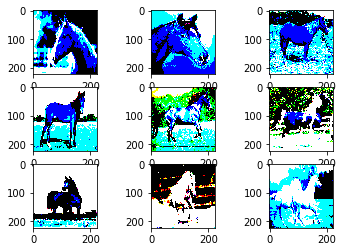

In [12]:

for i in range(0, 9):
  print(X_train[i].shape)
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X_train[i])
# show the plot
pyplot.show()

In [13]:
import imgaug.augmenters as iaa
aug = iaa.MultiplyHue((0.5, 1.5))
image_gen = ImageDataGenerator(rotation_range=15,
                               horizontal_flip=True,
                               vertical_flip=True,
                               data_format='channels_last')

In [14]:
image_gen.fit(X_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


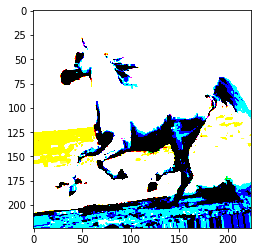

In [15]:

X_batch, y_batch = next(image_gen.flow(X_test, y_test, batch_size=8))
# create a grid of 3x3 images
for i in range(0,1):
  pyplot.imshow(X_batch[i])
# show the plot
  pyplot.show()


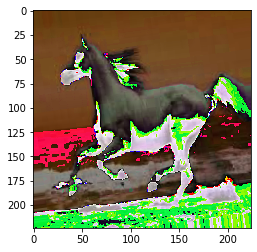

In [16]:
hue = aug(images=X_batch.astype(dtype=np.uint8))
for i in range(0, 1):
#   pyplot.subplot(100 + 1 + i)
  pyplot.imshow(hue[i])
  # show the plot
  pyplot.show()

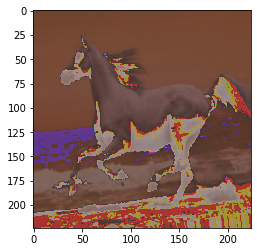

In [17]:
import imgaug.augmenters as iaa
contrast = iaa.imgcorruptlike.Contrast(severity=1)
con_img = contrast(images=X_batch.astype(dtype=np.uint8))
for i in range(0, 1):
#   pyplot.subplot(100 + 1 + i)
  pyplot.imshow(con_img[i])
  # show the plot
  pyplot.show()

In [18]:
print(y_test.shape)

(41, 3)


In [25]:
img_gen=image_gen.flow(X_test, y_test, batch_size=8)
img_gen2=image_gen.flow(X_test, y_test, batch_size=8)

In [30]:
def custom_gen(img_gen):
  seq = iaa.Sequential([
    iaa.MultiplyHue((0.5, 1.5)),
    iaa.imgcorruptlike.Contrast(severity=1)
  ])
  for X_batch, y_batch in img_gen:
    hue = seq(images = X_batch.astype(np.uint8))
    yield hue, y_batch

In [34]:
custom = custom_gen(img_gen)

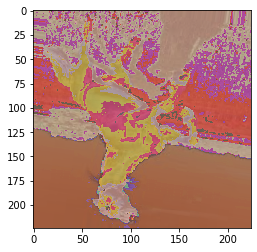

In [39]:
for X, y in custom:
  for i in range(0, 1):
  #   pyplot.subplot(100 + 1 + i)
    pyplot.imshow(X[i])
    # show the plot
    pyplot.show()
    break
  break